# Exercise

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
path = r'C:\Users\dylan\Documents\Instacart Basket Analysis'

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_flags.pkl'))
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,order_dow,hour_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,prices,exists,max_order,loyalty_flag,avg_prod_price,spending_flag,median_days,frequency_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,77,7,9.0,both,10,New customer,NaN,nan,NaN,nan
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,77,7,9.0,both,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,77,7,9.0,both,10,New customer,7.515897,Low spender,13.0,Regular customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,77,7,9.0,both,10,New customer,8.197727,Low spender,10.0,Frequent customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,77,7,9.0,both,10,New customer,8.205556,Low spender,20.0,Regular customer


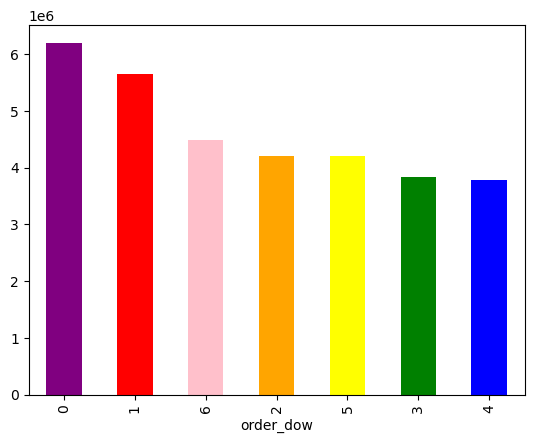

In [6]:
#Bar chart
bar = ords_prods_merge['order_dow'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [9]:
#Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

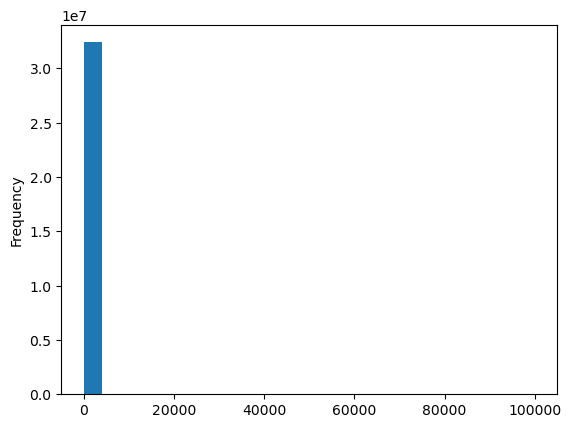

In [10]:
#Histogram
ords_prods_merge['prices'].plot.hist(bins=25)

In [15]:
#Checking for outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,order_dow,hour_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,prices,exists,max_order,loyalty_flag,avg_prod_price,spending_flag,median_days,frequency_flag
10030345,912404,17,prior,12,2,14,5.0,21553,5,0,...,108,16,14900.0,both,40,Regular customer,NaN,nan,NaN,nan
10030346,603376,17,prior,22,6,16,4.0,21553,3,1,...,108,16,14900.0,both,40,Regular customer,NaN,nan,NaN,nan
10030347,3264360,135,prior,2,2,21,13.0,21553,6,0,...,108,16,14900.0,both,4,New customer,NaN,nan,NaN,nan
10030348,892534,135,prior,3,0,8,12.0,21553,3,1,...,108,16,14900.0,both,4,New customer,NaN,nan,NaN,nan
10030349,229704,342,prior,8,1,19,30.0,21553,9,0,...,108,16,14900.0,both,16,Regular customer,NaN,nan,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,prior,29,0,8,4.0,33664,1,0,...,84,16,99999.0,both,39,Regular customer,NaN,nan,NaN,nan
29166210,2363282,204099,prior,31,0,9,2.0,33664,1,1,...,84,16,99999.0,both,39,Regular customer,NaN,nan,NaN,nan
29166211,3181945,204395,prior,13,3,15,8.0,33664,25,0,...,84,16,99999.0,both,15,Regular customer,NaN,nan,NaN,nan
29166212,2486215,205227,prior,7,3,20,4.0,33664,8,0,...,84,16,99999.0,both,12,Regular customer,NaN,nan,NaN,nan


In [16]:
#Convert to NaNs
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan
ords_prods_merge['prices'].max()

25.0

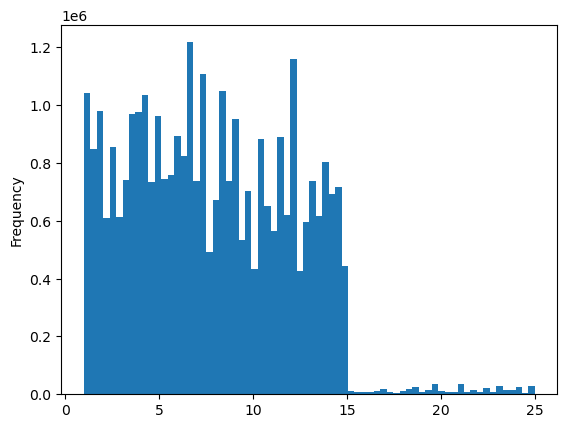

In [18]:
#Retrying hist
hist = ords_prods_merge['prices'].plot.hist(bins=70)

In [19]:
#Exporting histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices_freq.png'))

In [20]:
#Creating samples
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7
dev

array([False,  True, False, ...,  True,  True,  True])

In [21]:
#Splitting data into 70/30
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [22]:
len(ords_prods_merge)

32404859

In [23]:
len(big) + len(small)

32404859

In [25]:
df_2 = small[['order_dow', 'prices']]

In [29]:
df_2.head()

,order_dow,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0
